In [1]:
import numpy as np
import pandas as pd
from statistics import mean
import matplotlib.pyplot as plt
from tempfile import TemporaryFile
'''
Average Direct Normal Irradiance (ADNI)
Average Precipitation (AP) 3
Average Relative Humidity (ARH) 
Maximum Direct Normal Irradiance (MDNI) 2
Maximum Surface Temperature (MaxSur) 
Minimum Surface Temperature (MinSur) 1
Average Surface Temperature (AvgSur)

Maturity Group (MG), Genotype ID, State, Year, and Location for each performance record.
'''

'\nAverage Direct Normal Irradiance (ADNI)\nAverage Precipitation (AP) 3\nAverage Relative Humidity (ARH) \nMaximum Direct Normal Irradiance (MDNI) 2\nMaximum Surface Temperature (MaxSur) \nMinimum Surface Temperature (MinSur) 1\nAverage Surface Temperature (AvgSur)\n\nMaturity Group (MG), Genotype ID, State, Year, and Location for each performance record.\n'

In [2]:
data = np.load('inputs_others_train.npy')

In [3]:
df = pd.DataFrame(data)
df

,0,1,2,3,4
0,3.0,243.0,"""KS""",2009.0,98.0
1,6.0,114.0,"""AL""",2013.0,16.0
2,4.0,2878.0,"""TN""",2015.0,72.0
3,3.0,4535.0,"""MO""",2014.0,94.0
4,3.0,4501.0,"""NE""",2008.0,45.0
...,...,...,...,...,...
93023,8.0,1774.0,"""AL""",2014.0,144.0
93024,4.0,1363.0,"""IL""",2008.0,17.0
93025,2.0,182.0,"""IN""",2006.0,150.0
93026,5.0,699.0,"""LA""",2008.0,1.0


In [4]:
weather_data = np.load('inputs_weather_train.npy')

In [8]:
columns = ['ADNI','AP','ARH','MDNI','MaxSur','MinSur','AvgSur']

array([209.88,   0.  ,  85.38, 760.  ,  65.3 ,  40.5 ,  54.08])

In [9]:
newarr = weather_data.reshape(93028, 7*214)

array([67.71,  0.  , 71.71, ..., 67.3 , 52.9 , 58.29])

In [10]:
df2 = pd.DataFrame(newarr)

In [12]:
df2 = df2.iloc[: , :7]

In [13]:
col = ['ADNI','AP','ARH','MDNI','MaxSur','MinSur','AvgSur']

In [14]:
df2.columns = col

In [16]:
df2

,ADNI,AP,ARH,MDNI,MaxSur,MinSur,AvgSur
0,169.88,0.00,50.50,814.0,57.3,32.3,43.23
1,209.88,0.00,85.38,760.0,65.3,40.5,54.08
2,346.83,0.00,75.08,975.0,69.0,43.0,55.95
3,230.50,0.00,58.04,1008.0,61.8,29.0,41.98
4,304.71,0.00,73.25,910.0,44.7,31.7,37.08
...,...,...,...,...,...,...,...
93023,179.38,0.00,56.67,941.0,77.5,43.6,60.48
93024,86.46,0.03,86.50,603.0,61.4,41.0,49.33
93025,0.71,0.00,76.04,10.0,55.3,45.2,47.77
93026,36.88,0.02,90.58,361.0,77.4,67.1,70.35


In [17]:
df.columns = ['MG','Geno ID','State','Year','Location']

In [18]:
df2

,ADNI,AP,ARH,MDNI,MaxSur,MinSur,AvgSur
0,169.88,0.00,50.50,814.0,57.3,32.3,43.23
1,209.88,0.00,85.38,760.0,65.3,40.5,54.08
2,346.83,0.00,75.08,975.0,69.0,43.0,55.95
3,230.50,0.00,58.04,1008.0,61.8,29.0,41.98
4,304.71,0.00,73.25,910.0,44.7,31.7,37.08
...,...,...,...,...,...,...,...
93023,179.38,0.00,56.67,941.0,77.5,43.6,60.48
93024,86.46,0.03,86.50,603.0,61.4,41.0,49.33
93025,0.71,0.00,76.04,10.0,55.3,45.2,47.77
93026,36.88,0.02,90.58,361.0,77.4,67.1,70.35


In [19]:
yield_data = np.load('yield_train.npy')

In [20]:
df3 = pd.DataFrame(yield_data)
df3

,0
0,39.0
1,54.2
2,73.6
3,70.9
4,82.1
...,...
93023,22.2
93024,68.6
93025,65.6
93026,43.5


In [21]:
df = df3.join(df)

In [22]:
df_merged = df2.join(df)
df_merged

,ADNI,AP,ARH,MDNI,MaxSur,MinSur,AvgSur,0,MG,Geno ID,State,Year,Location
0,169.88,0.00,50.50,814.0,57.3,32.3,43.23,39.0,3.0,243.0,"""KS""",2009.0,98.0
1,209.88,0.00,85.38,760.0,65.3,40.5,54.08,54.2,6.0,114.0,"""AL""",2013.0,16.0
2,346.83,0.00,75.08,975.0,69.0,43.0,55.95,73.6,4.0,2878.0,"""TN""",2015.0,72.0
3,230.50,0.00,58.04,1008.0,61.8,29.0,41.98,70.9,3.0,4535.0,"""MO""",2014.0,94.0
4,304.71,0.00,73.25,910.0,44.7,31.7,37.08,82.1,3.0,4501.0,"""NE""",2008.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93023,179.38,0.00,56.67,941.0,77.5,43.6,60.48,22.2,8.0,1774.0,"""AL""",2014.0,144.0
93024,86.46,0.03,86.50,603.0,61.4,41.0,49.33,68.6,4.0,1363.0,"""IL""",2008.0,17.0
93025,0.71,0.00,76.04,10.0,55.3,45.2,47.77,65.6,2.0,182.0,"""IN""",2006.0,150.0
93026,36.88,0.02,90.58,361.0,77.4,67.1,70.35,43.5,5.0,699.0,"""LA""",2008.0,1.0


In [23]:
df_merged.columns = ['ADNI','AP','ARH','MDNI','MaxSur','MinSur','AvgSur','CropY','MG','Geno ID','State','Year','Location']

In [24]:
df_merged

,ADNI,AP,ARH,MDNI,MaxSur,MinSur,AvgSur,CropY,MG,Geno ID,State,Year,Location
0,169.88,0.00,50.50,814.0,57.3,32.3,43.23,39.0,3.0,243.0,"""KS""",2009.0,98.0
1,209.88,0.00,85.38,760.0,65.3,40.5,54.08,54.2,6.0,114.0,"""AL""",2013.0,16.0
2,346.83,0.00,75.08,975.0,69.0,43.0,55.95,73.6,4.0,2878.0,"""TN""",2015.0,72.0
3,230.50,0.00,58.04,1008.0,61.8,29.0,41.98,70.9,3.0,4535.0,"""MO""",2014.0,94.0
4,304.71,0.00,73.25,910.0,44.7,31.7,37.08,82.1,3.0,4501.0,"""NE""",2008.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93023,179.38,0.00,56.67,941.0,77.5,43.6,60.48,22.2,8.0,1774.0,"""AL""",2014.0,144.0
93024,86.46,0.03,86.50,603.0,61.4,41.0,49.33,68.6,4.0,1363.0,"""IL""",2008.0,17.0
93025,0.71,0.00,76.04,10.0,55.3,45.2,47.77,65.6,2.0,182.0,"""IN""",2006.0,150.0
93026,36.88,0.02,90.58,361.0,77.4,67.1,70.35,43.5,5.0,699.0,"""LA""",2008.0,1.0


In [129]:
DF = df_merged.groupby(['Geno ID']).mean()
DF

,ADNI,AP,ARH,MDNI,MaxSur,MinSur,AvgSur,CropY
Geno ID,,,,,,,,
1.0,209.844545,0.000000,71.247273,643.818182,52.427273,34.845455,42.424545,48.409091
10.0,228.775135,0.003514,74.506216,745.891892,52.000000,32.551351,41.042973,54.770270
100.0,284.503889,0.001111,56.193889,890.944444,72.155556,48.377778,57.941667,48.494444
1000.0,244.352778,0.000556,78.540556,853.333333,74.511111,53.588889,62.761667,51.083333
1001.0,233.735294,0.000000,79.664118,751.588235,75.452941,56.023529,64.955294,55.329412
...,...,...,...,...,...,...,...,...
995.0,280.380556,0.001111,77.372222,898.444444,76.783333,56.566667,65.630556,46.150000
996.0,185.778800,0.005200,75.099200,653.760000,76.588000,54.512000,63.794800,43.648000
997.0,174.779057,0.006038,77.673585,690.773585,72.115094,51.092453,59.964340,45.711321


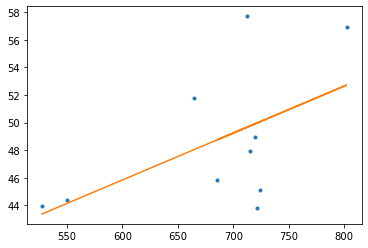

In [115]:
'''
*****This is a sample cell of what the function does*****

x = DF['MDNI']
y = DF['CropY']
plt.plot(x, y, '.')

m, b = np.polyfit(x, y, 1)


plt.plot(x, m*x + b)

*****This is a sample cell of what the function does*****
'''

In [116]:
'''
*****This is a sample cell of what the function does*****

cm = np.corrcoef(x, y)
cxy = cm[0,1]
r_squared = cxy**2
r_squared

*****This is a sample cell of what the function does*****
'''

0.29648600416063314

In [118]:
testothers = np.load('inputs_others_test.npy')
testweather = np.load('inputs_weather_test.npy')

In [119]:
df_test = pd.DataFrame(testothers)

In [120]:
newarr = testweather.reshape(10337, 7*214)
df_test2 = pd.DataFrame(newarr)

In [121]:
df_test2 = df_test2.iloc[: , :7]

In [122]:
df_test2.columns = ['ADNI','AP','ARH','MDNI','MaxSur','MinSur','AvgSur']
df_test.columns = ['MG','Geno ID','State','Year','Location']

In [123]:
df_test = df_test.join(df_test2)

In [124]:
df_test

,MG,Geno ID,State,Year,Location,ADNI,AP,ARH,MDNI,MaxSur,MinSur,AvgSur
0,3.0,3069.0,"""IA""",2010.0,41.0,335.75,0.00,75.67,932.0,80.8,59.2,67.33
1,4.0,2526.0,"""IN""",2004.0,154.0,87.88,0.00,82.46,632.0,48.2,37.1,41.95
2,3.0,636.0,"""IA""",2014.0,41.0,261.67,0.00,59.25,1009.0,60.1,27.5,40.17
3,5.0,1350.0,"""MD""",2005.0,113.0,170.50,0.00,88.08,634.0,56.6,45.5,50.08
4,3.0,2983.0,"""IL""",2006.0,148.0,2.04,0.00,70.92,11.0,58.4,45.1,50.38
...,...,...,...,...,...,...,...,...,...,...,...,...
10332,1.0,4511.0,"""MI""",2013.0,64.0,116.00,0.00,70.25,454.0,42.1,25.7,32.98
10333,3.0,5106.0,"""NE""",2007.0,136.0,347.04,0.00,73.04,973.0,64.3,42.6,49.38
10334,2.0,5826.0,"""IL""",2008.0,148.0,16.46,0.02,87.21,145.0,58.6,38.6,47.65
10335,1.0,5466.0,"""SD""",2005.0,10.0,361.13,0.00,47.33,1010.0,50.9,32.4,42.58


In [154]:
'''
*****This is a sample cell of what the function below does*****

yield_list = []

for row in df_test['ADNI']:
    y = (m*row)+b
    yield_list.append(y)
    
result = np.array(yield_list)
m

*****This is a sample cell of what the function does*****
'''

"\n*****This is a sample cell of what the function does*****\n\nyield_list = []\n\nfor row in df_test['ADNI']:\n    y = (m*row)+b\n    yield_list.append(y)\n    \nresult = np.array(yield_list)\nm\n\n*****This is a sample cell of what the function does*****\n"

In [155]:
'''
def list_func():
    yield_list = []

    for row in df_test['ADNI']:
        y = (m*row)+b
        yield_list.append(y)
    
    result = np.array(yield_list)
'''

"\ndef list_func():\n    yield_list = []\n\n    for row in df_test['ADNI']:\n        y = (m*row)+b\n        yield_list.append(y)\n    \n    result = np.array(yield_list)\n"

In [156]:

def calc_temp(colum):
    yield_list_final = []
    x = DF[colum]
    y = DF['CropY']
    plt.plot(x, y, '.')
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b)
    cm = np.corrcoef(x, y)
    cxy = cm[0,1]
    r_squared = cxy**2
    print(r_squared)
    #calc_list = slope()
    #### 
    for row in df_test[colum]:
        y = (m*row)+b
        yield_list_final.append(y)
    
    result = np.array(yield_list_final)
    return yield_list_final
    ####

0.07358566106704437
0.09424024348876195
0.04935035292441939
0.0815562347782411
0.00892649756638644
0.044330877476028784
0.025715503712251085


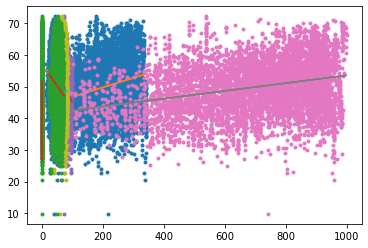

In [157]:
ADNI = calc_temp("ADNI")
AP = calc_temp("AP")
ARH = calc_temp("ARH")
MDNI = calc_temp("MDNI")
MaxSur = calc_temp("MaxSur")
MinSur = calc_temp("MinSur")
AvgSur = calc_temp("AvgSur")

combined_yield = [ADNI, AP, ARH, MDNI, MaxSur, MinSur, AvgSur]
combined_df = pd.DataFrame(combined_yield)

In [158]:
final_df = combined_df.mean(axis=0)
final_df

0        50.117354
1        49.833104
2        52.064396
3        49.541342
4        48.187143
           ...    
10332    50.549900
10333    51.322652
10334    46.992830
10335    52.727081
10336    52.550653
Length: 10337, dtype: float64

In [159]:
numpy_result = final_df.to_numpy()

In [160]:
len(numpy_result)

10337

In [163]:
np.save("results.npy", numpy_result)
result = np.load('results.npy')

In [164]:
result

array([50.11735403, 49.83310442, 52.064396  , ..., 46.9928298 ,
       52.72708079, 52.55065317])

In [165]:
len(result)

10337